# Bernstein-Vazirani Algorithm and its Qiskit Implementation

Another algorithm which shows a quantum speed-up is the Bernstein-Vazirani algorithm. The algorithm solves the following problem: given a function $f: \{0,1\}^n \rightarrow \{0,1\} $ which takes an $n$ bit string as input and outputs a single bit where there is exactly one $n$ bit string $s \in \{0,1\}^n$ that returns a value $f(s) = 1$, what is $s$?. 

In other words, for each input $x$, $f(x) = s \cdot x \, \text{(mod 2)}$. We are expected to find $s$.

To find $s$ classically, we would have to call the function $f(x)$ $n$ times, each time determining one of the bits of $s$.

On the other hand, a quantum algorithm can solve the problem in only one step! This gives a polynomial speed-up with respect to the classical algorithm. Let us see the quantum circuit which implements the corresponding algorithm.



## Quantum circuit for the Bernstein-Vazirani Algorithm

The quantum circuit that implements the Bernstein-Vazirani algorithm is shown below.

<img src="images/vazirani1.jpeg" width="300">

Here, $\text{Q}_f$ is the same query function as for the Deutsch algorithm, but now acts on $n$ qubits:
$$ \lvert x \rangle \rightarrow (-1)^{f(x)} \lvert x \rangle $$

The algorithm proceeds as follows.

<ol>
    <li> The input register is initialized to the zero state $$\lvert \psi_1 \rangle = \lvert 0 \rangle^{\otimes n} $$ </li><p></p>
    <li> Apply Hadamard on all qubits to get a uniform superposition of all $n$-bit strings 
    $$\lvert \psi_2 \rangle = \frac{1}{\sqrt{2^n}} \sum_{x \in \{0,1\}^{n} } \lvert x \rangle  $$
   </li><p></p>
    <li>We make a query $\text{Q}_f$, 
    $$ \lvert \psi_3 \rangle = \frac{1}{\sqrt{2^n}} \sum_{x \in \{0,1\}^{n} } (-1)^{f(x)} \lvert x \rangle \\
    = \frac{1}{\sqrt{2^n}} \sum_{x \in \{0,1\}^{n} } (-1)^{s_1 \cdot x_1} ... (-1)^{s_n \cdot x_n} \lvert x \rangle \\
    = \frac{\lvert 0 \rangle + (-1)^{s_1} \lvert 1 \rangle }{\sqrt{2}} \otimes ... \otimes \frac{\lvert 0 \rangle + (-1)^{s_n} \lvert 1 \rangle }{\sqrt{2}}   $$
   </li><p></p>
    <li> Apply Hadamard on all qubits
        $$ \lvert \psi_4 \rangle = \lvert s_1 \rangle ... \lvert s_n \rangle $$
   </li><p></p>
    <li> Measuring all $n$ qubits will give the secret $n$-bit string $s$
    </li>
</ol>

As mentioned above, the quantum algorithm provides a polynomial speed-up against the best classical algorithm. Although the problem still feels like it is purposely designed so that it will be easier to solve on a quantum computer, at the time it was quite an achievement to prove that such a speed-up was even possible.

## Example 

An example of realization of the Bernstein-Vazirani algorithm can be found in [1]. Again, the algorithm makes use of an ancilla qubit to implement the query function $Q_f$. Let us see the steps of the algorithm for $n=2$ qubits and a secret string $s=11$

<img src="images/vazirani_ex1.jpeg"  width="300">

<ol>
    <li> The input registers are initialized to zero and the ancilla qubit to one 
    $$\lvert \psi_1 \rangle = \lvert 0 0 \rangle \lvert 1 \rangle_a $$ 
   </li><p></p>
    
   <li> Apply Hadamard on all qubits
    $$\lvert \psi_2 \rangle = \frac{1}{2} \left( \lvert 0 0 \rangle + \lvert 0 1 \rangle + \lvert 1 0 \rangle + \lvert 1 1 \rangle \right) \frac{1}{\sqrt{2}} \left( \lvert 0 \rangle_a - \lvert 1 \rangle_a \right)  $$ 
   </li><p></p>
    
   <li> For the string $s=11$, the query function can be implemented as $\text{Q}_f = CX_{1a}CX_{2a}$, 
    $$ \lvert \psi_3 \rangle = \frac{1}{2\sqrt{2}} \left[ \lvert 0 0 \rangle \left( \lvert 0 \oplus 0 \oplus 0 \rangle_a - \lvert 1 \oplus 0 \oplus 0 \rangle_a \right)+ \lvert 0 1 \rangle  \left( \lvert 0 \oplus 0 \oplus 1 \rangle_a - \lvert 1 \oplus 0 \oplus 1 \rangle_a \right) + \lvert 1 0 \rangle  \left( \lvert 0 \oplus 1 \oplus 0 \rangle_a - \lvert 1 \oplus 1 \oplus 0 \rangle_a \right) + \lvert 1 1 \rangle  \left( \lvert 0 \oplus 1 \oplus 1 \rangle_a - \lvert 1 \oplus 1 \oplus 1 \rangle_a \right)  \right] $$ 
   </li><p></p>
    
   Thus
    $$ \lvert \psi_3 \rangle = \frac{1}{2\sqrt{2}} \left[ \lvert 0 0 \rangle \left( \lvert 0 \rangle_a - \lvert 1 \rangle_a \right) - \lvert 0 1 \rangle  \left( \lvert 0 \rangle_a - \lvert  1 \rangle_a \right) - \lvert 1 0 \rangle  \left( \lvert 0  \rangle_a - \lvert 1 \rangle_a \right) + \lvert 1 1 \rangle  \left( \lvert 0 \rangle_a - \lvert 1 \rangle_a \right)  \right] \\
   = \frac{1}{2} \left( \lvert 0 0 \rangle - \lvert 0 1 \rangle - \lvert 1 0 \rangle + \lvert 1 1 \rangle \right) \frac{1}{\sqrt{2}} \left( \lvert 0 \rangle_a - \lvert 1 \rangle_a \right)  \\
    = \frac{1}{\sqrt{2}} \left( \lvert 0 \rangle - \lvert 1 \rangle \right)\frac{1}{\sqrt{2}} \left( \lvert 0 \rangle - \lvert 1 \rangle \right)\frac{1}{\sqrt{2}} \left( \lvert 0 \rangle_a - \lvert 1 \rangle_a \right)$$
    
   </li><p></p>
    
   <li> Apply Hadamard on all qubits
        $$ \lvert \psi_4 \rangle = \lvert 1 \rangle \lvert 1 \rangle \lvert 1 \rangle $$
   </li><p></p>
   
   <li> Measuring the first two qubits will give the secret $2$-bit string $s = 11$
   </li><p></p>
</ol>

## Qiskit Implementation

We now implement the Bernstein-Vazirani algorithm with Qiskit by first preparing the environment.

In [1]:
#initialization
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# importing Qiskit
from qiskit import IBMQ, BasicAer
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute

# import basic plot tools
from qiskit.tools.visualization import plot_histogram

We first set the number of qubits used in the experiment, and the hidden integer $s$ to be found by the Bernstein-Vazirani algorithm. The hidden integer $s$ determines the circuit for the quantum oracle. 

In [2]:
nQubits = 4  # number of physical qubits used to represent s
s = 14      # the hidden integer whose bitstring is 1110

# make sure that a can be represented with nQubits
s = s % 2**(nQubits)
print('s = {} (bitstring = {})'.format(s, "{0:b}".format(s)))

s = 14 (bitstring = 1110)


We then use Qiskit to program the Bernstein-Vazirani algorithm.

In [3]:
# Creating registers
# qubits for querying the oracle and finding the hidden integer
# note that we are using 1 additional qubit as the ancilla
qr = QuantumRegister(nQubits+1)
# for recording the measurement on qr
cr = ClassicalRegister(nQubits+1)

bvCircuit = QuantumCircuit(qr, cr)

# set the ancilla qubit to |1> using an X gate
bvCircuit.x(qr[nQubits])

# Apply Hadamard gates before querying the oracle
for i in range(nQubits+1):
    bvCircuit.h(qr[i])    
    
# Apply barrier so that it is not optimized by the compiler
bvCircuit.barrier()

# Apply the inner-product oracle
for i in range(nQubits):
    if (s & (1 << i)):
        bvCircuit.cx(qr[i], qr[nQubits])
    else:
        bvCircuit.iden(qr[i])
        
# Apply barrier 
bvCircuit.barrier()

#Apply Hadamard gates after querying the oracle
for i in range(nQubits+1):
    bvCircuit.h(qr[i])
    
# undo the X gate on the ancilla qubit
bvCircuit.x(qr[nQubits])

# Measurement
bvCircuit.barrier(qr)
bvCircuit.measure(qr, cr)

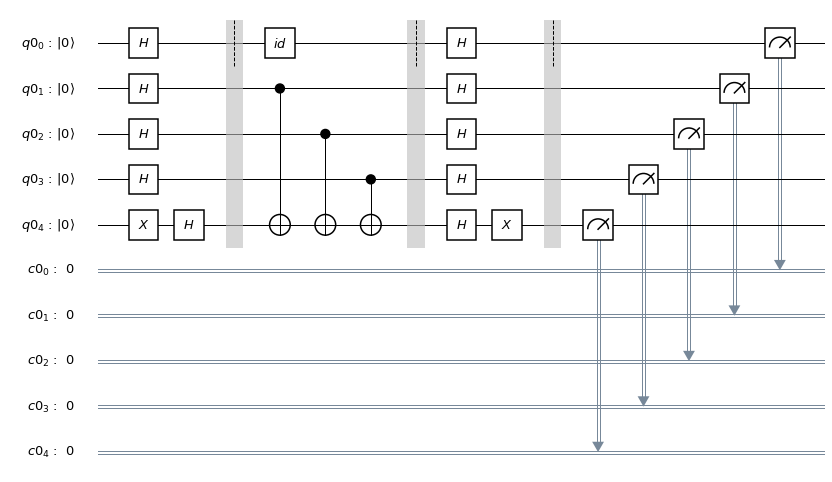

In [4]:
bvCircuit.draw(output='mpl')

## Experiment with Simulators

We can run the above circuit on the simulator. 

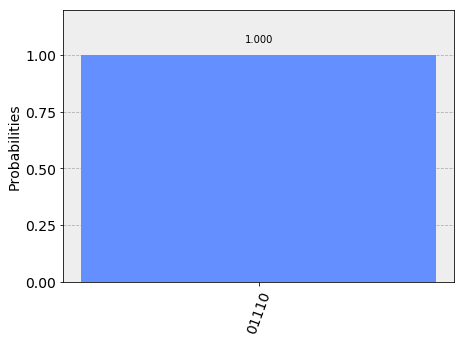

In [5]:
# use local simulator
backend = BasicAer.get_backend('qasm_simulator')
shots = 1024
results = execute(bvCircuit, backend=backend, shots=shots).result()
answer = results.get_counts()
plot_histogram(answer)

We can see that the result of the measurement is the binary representation of the hidden integer $s$. 

## Experiment with Real Devices

We can run the circuit on the real device as below.

In [6]:
# Load our saved IBMQ accounts and see devices that we are allowed to use
IBMQ.load_accounts()
IBMQ.backends()

[<IBMQBackend('ibmqx4') from IBMQ()>,
 <IBMQBackend('ibmqx2') from IBMQ()>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ()>,
 <IBMQBackend('ibmq_qasm_simulator') from IBMQ()>,
 <IBMQBackend('ibmq_20_tokyo') from IBMQ(ibm-q-internal, yrk, main)>,
 <IBMQBackend('ibmq_poughkeepsie') from IBMQ(ibm-q-internal, yrk, main)>,
 <IBMQBackend('ibmq_qasm_simulator') from IBMQ(ibm-q-internal, yrk, main)>]

In [7]:
# set up the job on a backend and execute it
backend = IBMQ.get_backend('ibmq_poughkeepsie')
shots = 1024
job_exp = execute(bvCircuit, backend=backend, shots=shots)

In [8]:
# get the results from the computation
results = job_exp.result()
answer = results.get_counts(bvCircuit)

In [9]:
# filter the results for plotting
threshold = int(0.01 * shots) #the threshold of plotting significant measurements
filteredAnswer = {k: v for k,v in answer.items() if v >= threshold} #filter the answer for better view of plots

removedCounts = np.sum([ v for k,v in answer.items() if v < threshold ]) #number of counts removed 
filteredAnswer['other_bitstrings'] = removedCounts  #the removed counts is assigned to a new index

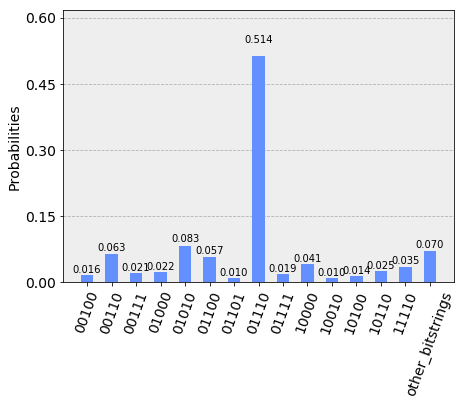

In [10]:
plot_histogram(filteredAnswer)

In [11]:
print(filteredAnswer)

{'10100': 14, '10110': 26, '10000': 42, '00111': 22, '01000': 23, '01101': 10, '11110': 36, '10010': 10, '00100': 16, '01111': 19, '01010': 85, '01100': 58, '01110': 526, '00110': 65, 'other_bitstrings': 72}


We indeed see that the most likely outcome is the binary representation of the hidden integer $s$ with a probability of about $0.5$.

## References

[1] S. D. Fallek, C. D. Herold, B. J. McMahon, K. M. Maller, K. R. Brown, J. M. Amini, Transport implementation of the Bernstein-Vazirani algorithm with ion qubits, New J. Phys. 18 (2016).

# Another One

<ol>
    <li>Bernstein-Vazirani</li>
    <li>Using QISKit AQUA with Grover search algorithm for the 3SAT problem</li>
</ol>


<div class="alert alert-block alert-success">
    
#  2. Bernstein-Vazirani
</div>

Source and details for calculation can be found here : https://youtu.be/sqJIpHYl7oo et là : https://community.qiskit.org/textbook/ch-algorithms/bernstein-vazirani.html



Let  $f_s$ a function from  $\{0,1\}^n$ to $\{0,1\}$, for which we know it returns the exclusive OR of all bit to bit products ($and$) between the input $x$ and a bit string $s$ (of length $n$) :



\begin{equation}
f_s(x) = s_0.x_0 \oplus s_1.x_1 \oplus s_2.x_2 \oplus \hspace{0.3cm} ... \hspace{0.3cm} \oplus s_{n-1}.x_{n-1}  
\end{equation}

Suppose $s$ is inknown and we want to discover it's value. 

With a classic algoritm, $n$ evaluations of $f_s(x)$ are needed to guess the secret value of $s$, using this procedure: 

\begin{equation}
f_s(1000...0) = s_0 \\
f_s(0100...0) = s_1 \\
f_s(0010...0) = s_2 \\
... \\
f_s(0000...1) = s_{n-1}
\end{equation}

Bernstein-Vazirani can reveal the value of $s$ in only one pass (using $𝓞(n)$ gates) 


<img src="./images/bv.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="600 px" align="center">

This is how we proceed: 

In [ ]:
# choose a value of s here (it will be hidden in the circuit,

# and the result of the execution will reveal this value in just one pass) : 

s = '111100'

# preps

%matplotlib inline

from qiskit import QuantumRegister, QuantumCircuit, ClassicalRegister, execute

from qiskit import Aer   

backend = Aer.get_backend('qasm_simulator')

n = len(s)

​

bv = QuantumCircuit(n+1,n)

​

bv.x(n)          # ancillary qubit set to |1>  

bv.barrier()     # 

bv.h(range(n+1)) # superposition of all qubits (x and ancillary) 

bv.barrier()     # 

​

for numero, un_ou_zero in enumerate(reversed(s)):

    if un_ou_zero == '1': 

        bv.cx(numero, n)  # Cx from all entry qubits with the ancilliary

​

bv.barrier()     # 

bv.h(range(n))   # superposition of output 

bv.barrier()     # 

bv.measure(range(n), range(n)) # mesure sur les n qubits.

​

bv.draw(output='mpl')



In [ ]:
# execution
res = execute(bv,backend=backend,shots=1).result()
counts = res.get_counts()
print(counts)